# Descrição

Código feito para comparar a aplicação do dataset bike_rentals diretamente no ML Azure.

Código foi feito para ter um parâmetro de conferência entre manualmente e feito diretamente na nuvem.

In [512]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [513]:
df = pd.read_csv('/content/sample_data/bike_rentals.csv')  # Substitua pelo caminho correto do arquivo

In [514]:
df

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27,12,2012,1,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,28,12,2012,1,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,29,12,2012,1,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,30,12,2012,1,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   year        731 non-null    int64  
 3   season      731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  rentals     731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB


In [516]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,731.0,15.738714,8.809949,1.000000,8.000000,16.000000,23.000000,31.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
year,731.0,2011.500684,0.500342,2011.000000,2011.000000,2012.000000,2012.000000,2012.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


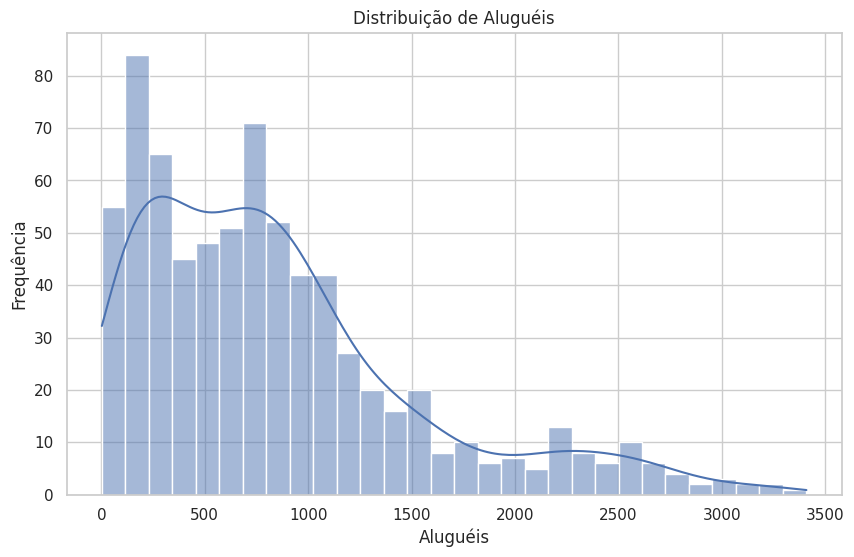

In [517]:
# Gráfico 1: Histograma de Aluguéis
# Este gráfico mostra a distribuição do número de aluguéis diários.
plt.figure(figsize=(10, 6))
sns.histplot(df['rentals'], bins=30, kde=True)
plt.title('Distribuição de Aluguéis')
plt.xlabel('Aluguéis')
plt.ylabel('Frequência')
plt.show()

**Análise**
> Observando a distribuição dos dados de aluguéis, notamos características comuns em dados de contagem, como uma distribuição assimétrica e a presença de possíveis outliers.

> Esses fatores podem afetar significativamente a precisão de modelos preditivos, então é importante considerar algumas etapas de pré-processamento para otimizar a análise

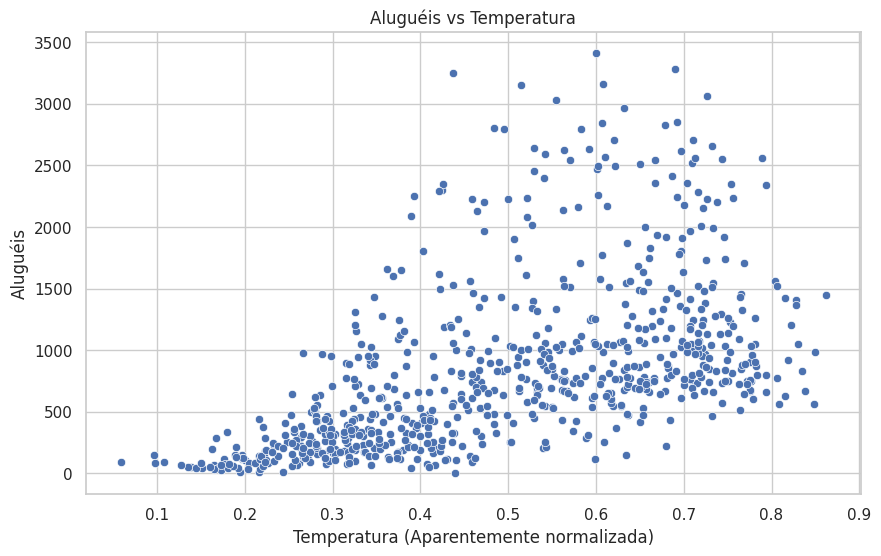

In [518]:
# Gráfico 2: Relação entre Aluguéis e Temperatura
# Este gráfico de dispersão mostra como os aluguéis variam com a temperatura.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='rentals', data=data)
plt.title('Aluguéis vs Temperatura')
plt.xlabel('Temperatura (Aparentemente normalizada)')
plt.ylabel('Aluguéis')
plt.show()

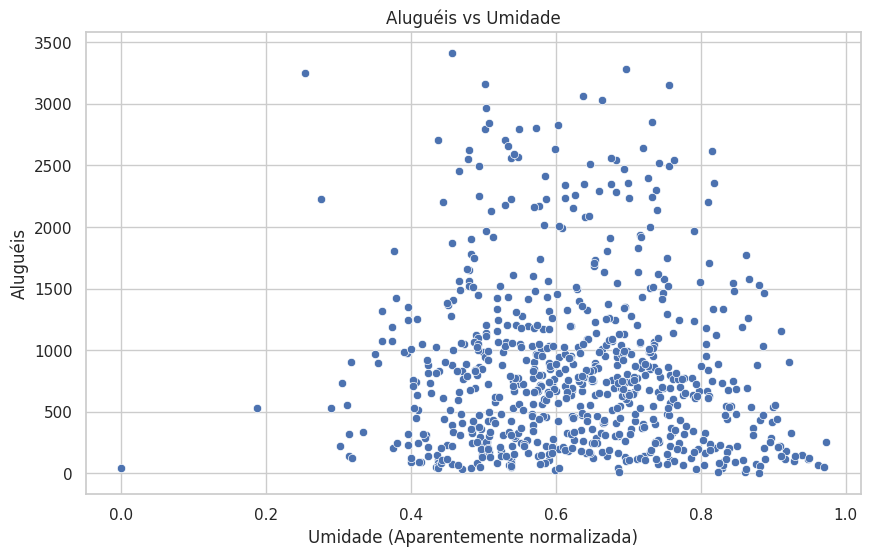

In [519]:
# Gráfico 3: Relação entre Aluguéis e Umidade
# Este gráfico de dispersão explora a relação entre umidade e aluguéis.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='rentals', data=data)
plt.title('Aluguéis vs Umidade')
plt.xlabel('Umidade (Aparentemente normalizada)')
plt.ylabel('Aluguéis')
plt.show()

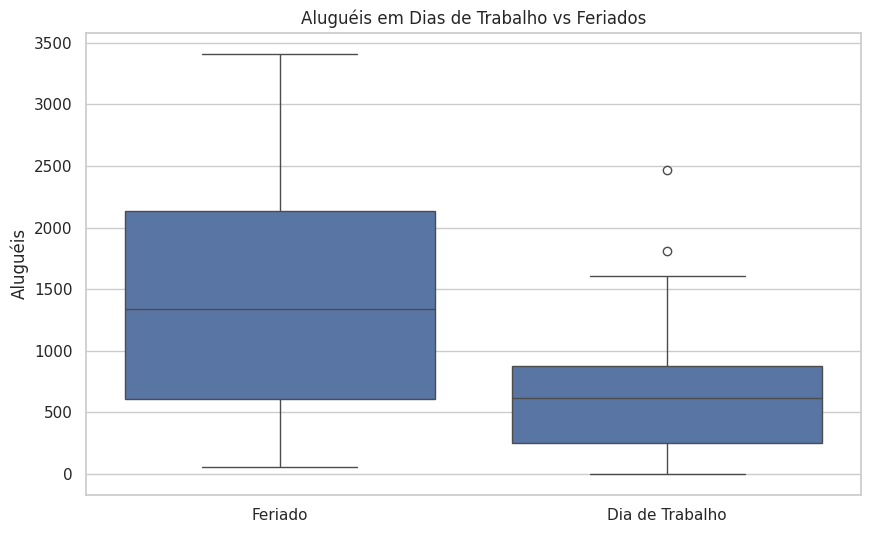

In [520]:
# Gráfico 4: Aluguéis em Dias de Trabalho vs Feriados
# Este gráfico de caixa compara o número de aluguéis entre dias de trabalho e feriados.
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='rentals', data=data)
plt.title('Aluguéis em Dias de Trabalho vs Feriados')
plt.xticks([0, 1], ['Feriado', 'Dia de Trabalho'])
plt.xlabel('')
plt.ylabel('Aluguéis')
plt.show()

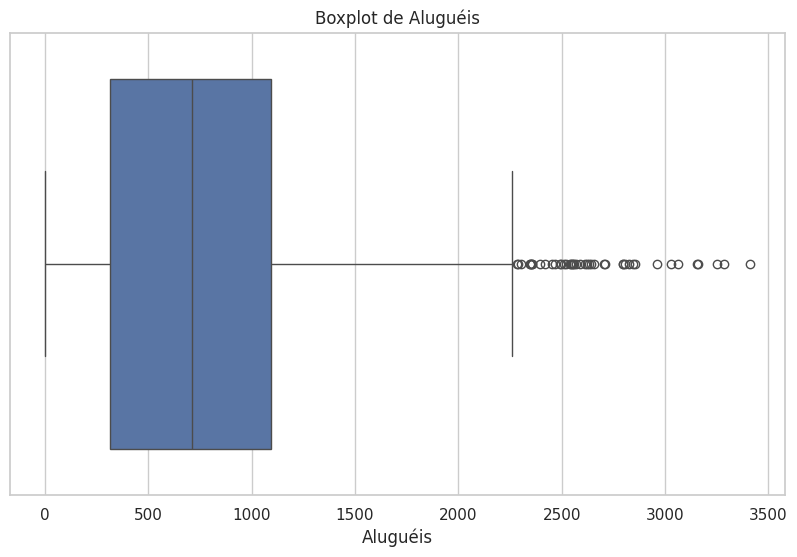

In [521]:
# Criando o boxplot para a variável 'rentals'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['rentals'])
plt.title('Boxplot de Aluguéis')
plt.xlabel('Aluguéis')
plt.show()

In [522]:
# Calculando o IQR
Q1 = df['rentals'].quantile(0.25)
Q3 = df['rentals'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para detecção de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrando os outliers
filtered_data = df[(df['rentals'] >= lower_bound) & (df['rentals'] <= upper_bound)]

# Mostrando o efeito do filtro
print("Data original: ", df.shape)
print("Data filtrado: ", filtered_data.shape)


Data original:  (731, 13)
Data filtrado:  (687, 13)


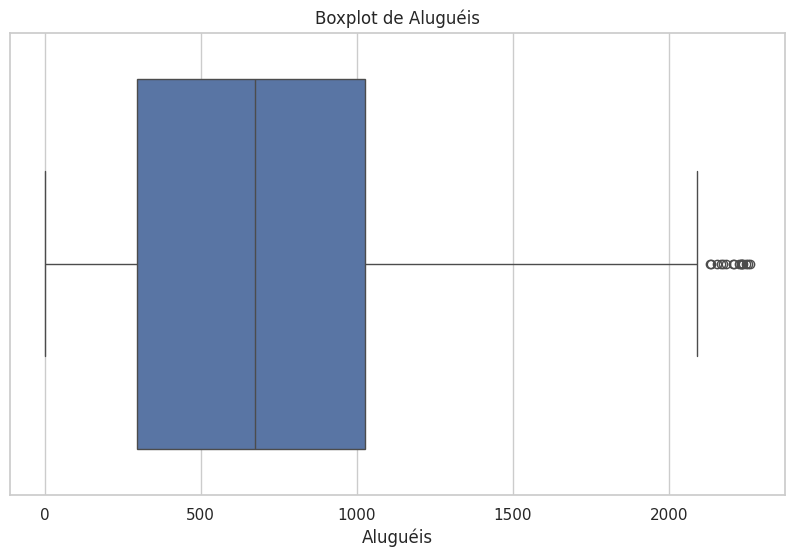

In [523]:
# Criando o boxplot para a variável 'rentals'
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['rentals'])
plt.title('Boxplot de Aluguéis')
plt.xlabel('Aluguéis')
plt.show()

In [524]:
# Aplicando transformação logarítmica
filtered_data['log_rentals'] = np.log1p(filtered_data['rentals'])


<ipython-input-524-07c6c024010a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_rentals'] = np.log1p(filtered_data['rentals'])


In [525]:
# Normalização e Encoding
categorical_features = ['day', 'mnth', 'year', 'holiday', 'season', 'weekday', 'workingday', 'weathersit']
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']


In [526]:
# Transformadores para variáveis categóricas e numéricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
# numeric_transformer = StandardScaler()   # Nesse caso os números já estão normalizados entre 0 e 1



In [527]:
# Combinando transformadores em um único preprocessador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [528]:
# Divisão em conjuntos de treino e teste
X = filtered_data[numeric_features + categorical_features]
y = filtered_data['log_rentals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [529]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 12), (207, 12), (480,), (207,))

In [530]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [531]:
# Aplicando o preprocessamento aos dados de treino e teste
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
X_val_preprocessed = preprocessor.transform(X_val)


In [532]:
# Informações sobre o preprocessamento e a divisão dos dados
print("Dados de treino pré-processados:", X_train_preprocessed.shape)
print("Dados de teste pré-processados:", X_test_preprocessed.shape)
print("Dados de validação pré-processados:", X_test_preprocessed.shape)

Dados de treino pré-processados: (384, 67)
Dados de teste pré-processados: (207, 67)
Dados de validação pré-processados: (207, 67)


1. **ElasticNet** - Um modelo de regressão que combina as penalidades dos modelos Lasso e Ridge. É útil quando há múltiplas características que são correlacionadas.
2. **GradientBoosting** - Um modelo de regressão baseado em boosting que constrói modelos de forma sequencial, onde cada novo modelo corrige erros cometidos pelos modelos anteriores.
3. **DecisionTree** - Um modelo de regressão baseado em árvores de decisão que divide o dataset em conjuntos menores enquanto simultaneamente desenvolve uma árvore de decisão associada.
4. **KNN (K-Nearest Neighbors)** - Um modelo que prevê o valor de uma observação com base na média dos valores dos k vizinhos mais próximos.
5. **LassoLars** - Uma regressão Lasso aplicada através do algoritmo Least Angle Regression (LARS), útil especialmente para modelos com alta dimensionalidade.
6. **SGD (Stochastic Gradient Descent)** - Um método de otimização que ajusta os parâmetros de um modelo de forma iterativa para minimizar uma função de custo, comum em regressão linear e logística.
7. **RandomForest** - Um modelo baseado em várias árvores de decisão que treina subconjuntos do dataset e usa a média para melhorar a precisão preditiva e controlar o overfitting.
8. **ExtremeRandomTrees** - Uma variação do RandomForest que faz splits aleatórios das características, resultando em árvores mais diversificadas.
9. **LightGBM** - Um modelo eficiente de gradient boosting que lida bem com grandes quantidades de dados e é otimizado para desempenho e eficiência de memória.
10. **XGBoostRegressor** - Parte da biblioteca XGBoost, este é um modelo altamente eficiente e flexível de gradient boosting, amplamente utilizado em competições de data science devido à sua velocidade e performance.

In [533]:
from sklearn.linear_model import ElasticNet, SGDRegressor, LassoLars
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [534]:
modelos = [
    ElasticNet(),
    GradientBoostingRegressor(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    # LassoLars(),
    SGDRegressor(),
    RandomForestRegressor(n_estimators=300, random_state=42),
    ExtraTreesRegressor(),
    LGBMRegressor(verbose=-1),
    XGBRegressor(objective='reg:squarederror')
]

In [535]:
def calculate_nrmse(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    range_y = np.max(y_true) - np.min(y_true)
    nrmse = rmse / range_y
    return nrmse


In [536]:
y_true = y_test
train_predictions = model.predict(X_val_preprocessed)

train_predictions.shape

(96,)

In [537]:
# Logging para comparação visual
log_cols = ["Regressor", "R-squared", "Mean Squared Error"]
log = pd.DataFrame(columns=log_cols)

i = 1
for model in modelos:
    model.fit(X_train_preprocessed, y_train)
    name = model.__class__.__name__

    print("="*30)
    print(f"# {i} Modelo: {name}")

    print('****Results****')
    y_true = y_val
    train_predictions = model.predict(X_val_preprocessed)

    nrmse = calculate_nrmse(y_true, train_predictions)

    mse = mean_squared_error(y_val, train_predictions)
    r2 = r2_score(y_val, train_predictions)
    print("R-squared: {:.4f}".format(r2))
    print("Mean Squared Error: {:.4f}".format(mse))
    print("NRMSE: {:.4f}".format(nrmse))

    # Criando um DataFrame temporário para a nova entrada
    log_entry = pd.DataFrame([[name, r2 * 100, mse]], columns=log_cols)
    # Usando concat ao invés de append
    log = pd.concat([log, log_entry], ignore_index=True)
    i += 1

    print("\n")

print("="*30)
print(log.sort_values(by="R-squared", ascending=False))

# 1 Modelo: ElasticNet
****Results****
R-squared: 0.1696
Mean Squared Error: 0.6018
NRMSE: 0.1912


# 2 Modelo: GradientBoostingRegressor
****Results****
R-squared: 0.7642
Mean Squared Error: 0.1709
NRMSE: 0.1019


# 3 Modelo: DecisionTreeRegressor
****Results****
R-squared: 0.5448
Mean Squared Error: 0.3299
NRMSE: 0.1416


# 4 Modelo: KNeighborsRegressor
****Results****
R-squared: 0.7398
Mean Squared Error: 0.1886
NRMSE: 0.1071


# 5 Modelo: SGDRegressor
****Results****
R-squared: 0.7557
Mean Squared Error: 0.1771
NRMSE: 0.1037


# 6 Modelo: RandomForestRegressor
****Results****
R-squared: 0.7457
Mean Squared Error: 0.1843
NRMSE: 0.1058


# 7 Modelo: ExtraTreesRegressor
****Results****
R-squared: 0.7869
Mean Squared Error: 0.1545
NRMSE: 0.0969


# 8 Modelo: LGBMRegressor
****Results****
R-squared: 0.7291
Mean Squared Error: 0.1963
NRMSE: 0.1092


# 9 Modelo: XGBRegressor
****Results****
R-squared: 0.7450
Mean Squared Error: 0.1848
NRMSE: 0.1060


                   Regressor  R-square

In [538]:
# Nomeando os modelos para facilitar a identificação
model_names = ['GradientBoostingRegressor', 'RandomForestRegressor', 'LGBMRegressor']
selected_models = [model for model in modelos if model.__class__.__name__ in model_names]


# Usando os dados de teste para avaliação
print("Test:")
for model in selected_models:
    test_predictions = model.predict(X_test_preprocessed)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    test_nrmse = calculate_nrmse(y_test, test_predictions)

    print(f"{model.__class__.__name__}:")
    print(f"  R-squared: {test_r2:.4f}")
    print(f"  MSE: {test_mse:.4f}")
    print(f"  NRMSE: {test_nrmse:.4f}\n")


Test:
GradientBoostingRegressor:
  R-squared: 0.8344
  MSE: 0.1442
  NRMSE: 0.0851

RandomForestRegressor:
  R-squared: 0.8264
  MSE: 0.1512
  NRMSE: 0.0871

LGBMRegressor:
  R-squared: 0.8299
  MSE: 0.1481
  NRMSE: 0.0862



# Métricas alcançadas no Azure

**Nome do algoritmo**

MaxAbsScaler, RandomForest

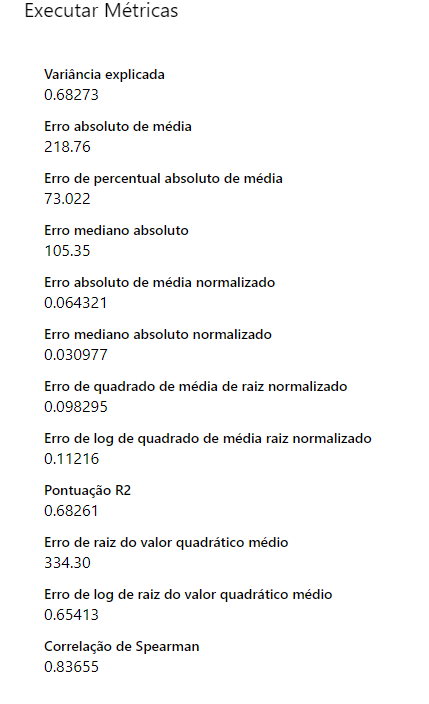